### Task variant 20
* Classes count: $N = 4$
* Elements in class: $M = 536$
* Error min. $R1 = 0.49$ max. $R2 = 0.51$

In [58]:
N = 4
M = 536
R1 = 0.49
R2 = 0.51

DATA_FRAGMENTATION = 0.5
CLOUD_SHIFT = 0.55

GRAPH_POINT_SIZE = 30
GRAPH_POINT_ALPHA = 0.2

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

#### Generating 2d Gaussian noise, $M$ points by 2 coordinates

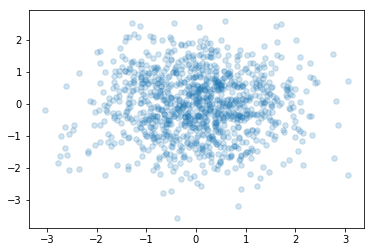

In [60]:
noise = np.random.randn(M * 2, 2) 
plt.scatter(noise[:,0], noise[:,1], s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)

#### Shifting noise a bit to create clouds

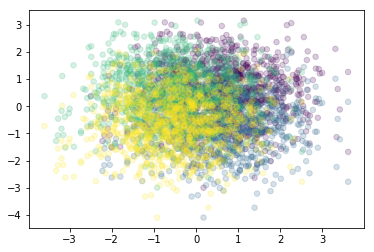

In [61]:
XY = np.vstack([
    noise + np.array([CLOUD_SHIFT, CLOUD_SHIFT]), 
    noise + np.array([CLOUD_SHIFT, -CLOUD_SHIFT]), 
    noise + np.array([-CLOUD_SHIFT, CLOUD_SHIFT]), 
    noise + np.array([-CLOUD_SHIFT, -CLOUD_SHIFT])
])

annotations = [0] * M * 2 + [1] * M * 2 + [2] * M * 2 + [3] * M * 2

plt.scatter(XY[:,0], XY[:,1], c=annotations, s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)

In [62]:
for i in range(N):
    print(f"Cloud {i}:")
    print(f"Mean: {XY[i].mean()} \n Std: {XY[i].std()}\n Mean axis=0: {XY[i].mean(axis=0)}\n")

Cloud 0:
Mean: 0.7680582887010419 
 Std: 0.4269757995751207
 Mean axis=0: 0.7680582887010419

Cloud 1:
Mean: 0.06225877673097663 
 Std: 0.16176292351001137
 Mean axis=0: 0.06225877673097663

Cloud 2:
Mean: 0.6195173863492136 
 Std: 0.3624230390379591
 Mean axis=0: 0.6195173863492136

Cloud 3:
Mean: 0.2845426892456915 
 Std: 0.08559165666295143
 Mean axis=0: 0.2845426892456915



#### Shuffling data, generating training and testing sets 

In [63]:
data, labels = shuffle(XY, annotations)

test_size = int(len(data) * DATA_FRAGMENTATION)
Xtrain = data[:test_size]
Ytrain = labels[:test_size]
Xtest = data[test_size:]
Ytest = labels[test_size:]

#### Creating and fitting the model

In [64]:
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain);

C:\Users\Jane Doe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jane Doe\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### Testing the model

In [65]:
predictions = clf.predict(Xtest)
confusion_matrix(Ytest, predictions)

array([[266, 109, 104,  55],
       [113, 261,  45, 120],
       [104,  36, 274, 124],
       [ 38,  98, 113, 284]], dtype=int64)

In [66]:
score = accuracy_score(Ytest, predictions)
is_fitting = R1 <= score and score <= R2

print(f"Score: {score} \n Fitting in accuracy range: {is_fitting}")

Score: 0.5060634328358209 
 Fitting in accuracy range: True


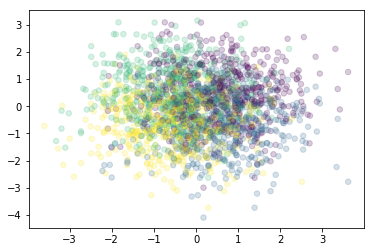

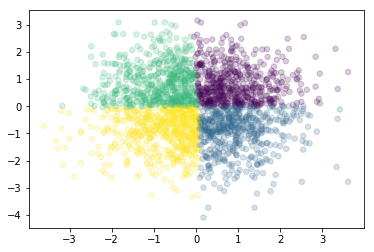

In [67]:
plt.scatter(Xtest[:,0], Xtest[:,1], c=Ytest, s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)
plt.show()
plt.scatter(Xtest[:,0], Xtest[:,1], c=predictions, s=GRAPH_POINT_SIZE, alpha=GRAPH_POINT_ALPHA)
plt.show()